<a href="https://colab.research.google.com/github/tejalvs/RobotOdometryMining/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px
from sklearn.model_selection import train_test_split 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
roomba_data=pd.read_csv('/content/drive/MyDrive/RoombaData_XY_cleaned.csv')
mobile_robot_data=pd.read_csv('/content/drive/MyDrive/MobileRobot_XY_cleaned.csv')
roomba_data=roomba_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
mobile_robot_data=mobile_robot_data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)


In [5]:
mobile_robot_data.columns

Index(['X_ODOM', 'Y_ODOM', 'Theta', 'Velocity', 'Odometry_Distance', 'X_GR',
       'Y_GR', 'Ground_Truth_Distance', 'Surface_Type', 'Time_To_Travel',
       'Cumulative_Time', 'Cumulative_Theta', 'Series_ID',
       'Distance_travelled_error', 'X_error', 'Y_error', 'timestamp'],
      dtype='object')

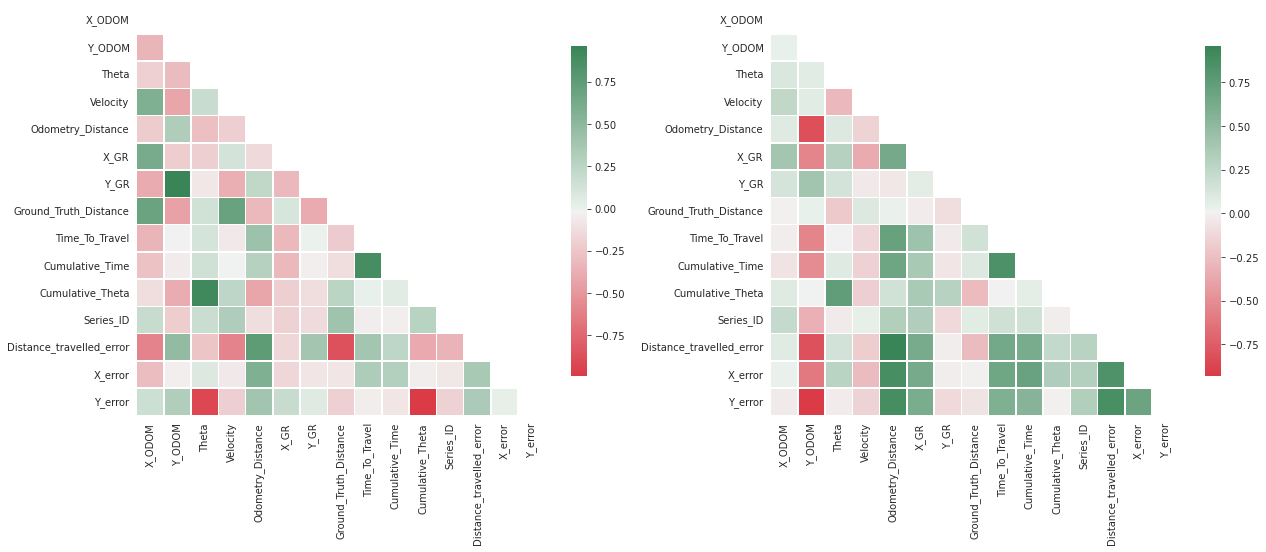

In [6]:
corr1 = roomba_data.corr()
corr2 = mobile_robot_data.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr1, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(1,2,figsize=(18, 10))
cmap = sns.diverging_palette(10, 500, as_cmap=True)
sns.heatmap(corr1, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
sns.heatmap(corr2, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
f.tight_layout()

In [88]:
data=roomba_data[['Series_ID','Theta','Velocity','Cumulative_Time','Cumulative_Theta','Distance_travelled_error','Surface_Type','X_error', 'Y_error']]
label=[]
for i in data['Distance_travelled_error']:
  if i>0.01:
    label.append(1)
  else:
    label.append(0)
data['Label']=label
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Series_ID,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Distance_travelled_error,Surface_Type,X_error,Y_error,Label
0,1.0,5.687978e-03,-0.1,0.299245,-1.192579e+00,0.001278,CARPET,0.001003,0.000007,0
1,1.0,5.687978e-03,-0.1,0.614497,-1.186891e+00,0.000000,CARPET,0.000502,0.000004,0
2,1.0,3.791985e-03,-0.1,0.946024,-1.183099e+00,0.001055,CARPET,0.000891,0.000007,0
3,1.0,3.791985e-03,-0.1,1.294334,-1.179307e+00,0.003552,CARPET,0.003064,0.000018,0
4,1.0,5.687978e-03,-0.1,1.658858,-1.173619e+00,0.006213,CARPET,0.006818,0.000032,0
...,...,...,...,...,...,...,...,...,...,...
3810,20.0,0.000000e+00,0.5,102.113155,-5.633375e-15,0.001138,CARPET,0.297826,0.001309,0
3811,20.0,0.000000e+00,0.5,104.223514,-5.633375e-15,0.000650,CARPET,0.294591,0.001305,0
3812,20.0,-2.449294e-16,0.5,106.335338,-5.878305e-15,0.000467,CARPET,0.289869,0.001300,0
3813,20.0,0.000000e+00,0.5,108.449860,-5.878305e-15,0.000817,CARPET,0.285292,0.001296,0


In [89]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [91]:
#Setting the value for X and Y
x = data[['Cumulative_Theta']]
y = data['Distance_travelled_error']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


In [92]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  0.9587294584651253
Coefficient: [-0.00856496]


In [93]:
print('Regression Equation: Distance_travelled_error = 1.4208392892091353 + 0.00622844 * Cumulative_Theta')

Regression Equation: Distance_travelled_error = 1.4208392892091353 + 0.00622844 * Cumulative_Theta


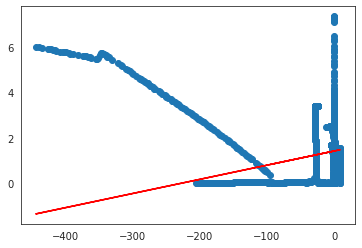

In [94]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.4208392892091353 + 0.00622844 * x_train, 'r')
plt.show()

In [95]:
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [96]:
print("Prediction for test set: {}".format(y_pred_slr))
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

Prediction for test set: [0.95872946 0.92414016 0.95952517 ... 0.95387397 0.99557599 0.96751481]


,Actual value,Predicted value
2486,0.697818,0.958729
3727,0.082497,0.924140
2110,0.018352,0.959525
3312,0.226662,0.956164
2822,2.042135,0.958729
...,...,...
1171,3.395776,1.163732
3498,0.009855,0.880668
3633,0.013609,0.953874
1833,1.676013,0.995576


In [97]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 16.09


In [98]:

# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.1099352973934415
Mean Square Error: 2.003919180408797
Root Mean Square Error: 1.4155985237378559


In [99]:
x = data[['Velocity', 'Cumulative_Time']]
y = data['X_error']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)


In [100]:

mlr= LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [101]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

0.5798612463306801


[('Velocity', -0.15455175649146904),
 ('Cumulative_Time', 0.00019336266088628072)]

In [102]:
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.67953363 0.56247197 0.73618363 ... 0.52799503 1.2364361  0.66395266]


In [103]:

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
2486,0.964970,0.679534
3727,0.806493,0.562472
2110,0.370508,0.736184
3312,0.260902,0.554261
2822,0.484026,0.664511
...,...,...
1171,1.273923,1.345163
3498,0.614347,0.756257
3633,0.102602,0.527995
1833,0.313243,1.236436


In [104]:

# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 9.31


In [105]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.4874637813112133
Mean Square Error: 0.40802825842066714
Root Mean Square Error: 0.6387708966606628


In [106]:

# define dataset
X=data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','Surface_Type'	,'X_error','Y_error']]
model=LogisticRegression(random_state=1)
# define the model
features=pd.get_dummies(data[['Theta'	,'Velocity',	'Cumulative_Time',	'Cumulative_Theta','X_error','Y_error','Surface_Type']])
model = LogisticRegression(random_state=1)
model.fit(features,data['Label'])
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[(i) for i in model.coef_[0]]})
feature_importance.sort_values('feature_importance')
feature_importance


,feature,feature_importance
0,Theta,0.008303
1,Velocity,-1.969736
2,Cumulative_Time,0.000017
3,Cumulative_Theta,-0.010873
4,X_error,0.596307
5,Y_error,-0.072793
6,Surface_Type_CARPET,0.836130


In [31]:
model=RandomForestClassifier()
 
model.fit(features,data['Label'])
 
feature_importances=pd.DataFrame({'features':features.columns,'feature_importance':model.feature_importances_})
feature_importances.sort_values('feature_importance')

,features,feature_importance
6,Surface_Type_CARPET,0.010912
7,Surface_Type_TILE,0.011625
0,Theta,0.026159
3,Cumulative_Theta,0.053412
1,Velocity,0.197355
4,X_error,0.214880
2,Cumulative_Time,0.231922
5,Y_error,0.253736


In [11]:
model=smf.logit('Label~Theta+Velocity+Cumulative_Time+Cumulative_Theta+Surface_Type',data=data)
result = model.fit()
 
feature_importances=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
feature_importances.sort_values('absolute_coefficients',ascending=False).drop('Intercept')[['absolute_coefficients']]


Optimization terminated successfully.
         Current function value: 0.531569
         Iterations 6


,absolute_coefficients
Surface_Type[T.TILE],0.351040
Velocity,0.231863
Theta,0.183890
Cumulative_Time,0.000417
Cumulative_Theta,0.000186


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data

,Series_ID,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Distance_travelled_error,Surface_Type,X_error,Y_error,Label
0,0.0,0.000000e+00,0.25,0.545720,0.000000e+00,0.012151,TILE,0.012141,0.000021,1
1,0.0,0.000000e+00,0.25,1.141841,0.000000e+00,0.012384,TILE,0.012228,0.000021,1
2,0.0,0.000000e+00,0.25,1.787944,0.000000e+00,0.013017,TILE,0.012441,0.000022,1
3,0.0,0.000000e+00,0.25,2.484894,0.000000e+00,0.018518,TILE,0.012168,0.000025,1
4,0.0,0.000000e+00,0.25,3.218403,0.000000e+00,0.021477,TILE,0.008079,0.000028,1
...,...,...,...,...,...,...,...,...,...,...
13313,61.0,-2.449294e-16,0.30,746.610621,-3.477997e-14,0.035410,CARPET,0.666759,0.003800,1
13314,61.0,-2.449294e-16,0.30,756.146195,-3.502490e-14,0.035323,CARPET,0.662488,0.003793,1
13315,61.0,-2.449294e-16,0.30,765.731923,-3.526983e-14,0.035381,CARPET,0.656178,0.003784,1
13316,61.0,-2.449294e-16,0.30,775.367627,-3.551476e-14,0.035381,CARPET,0.649981,0.003774,1


In [13]:
X=data[['Theta','Velocity','Cumulative_Time','Cumulative_Theta','X_error','Y_error']]
Y=data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

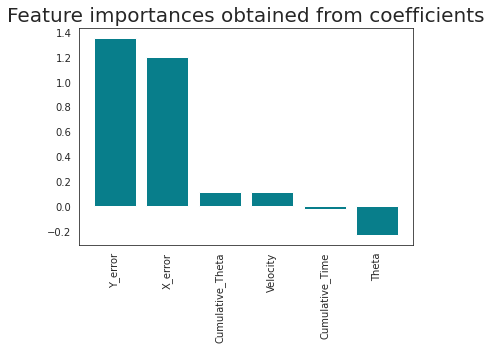

In [15]:

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [16]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

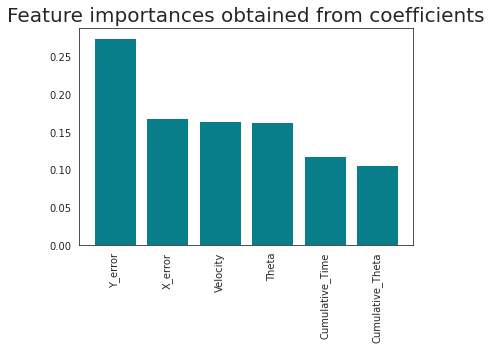

In [17]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [107]:
from sklearn.decomposition import PCA

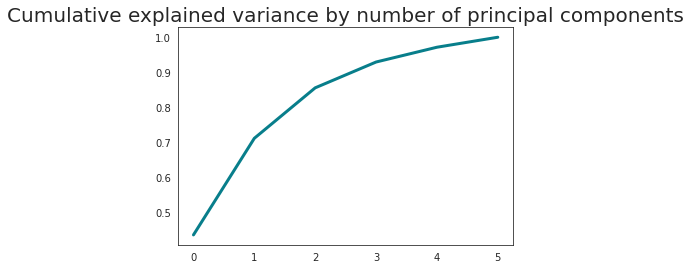

In [108]:
pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


In [109]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)

In [110]:
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6
Theta,0.522311,-0.765349,-0.088462,0.061441,0.350458,0.084327
Velocity,-0.435974,0.188910,-0.877834,-0.008752,0.050595,0.033334
Cumulative_Time,0.736163,0.431892,-0.104403,0.487887,0.033003,-0.147005
Cumulative_Theta,0.526954,-0.737558,-0.255240,-0.096044,-0.268843,-0.178267
X_error,0.908002,0.209632,-0.102114,-0.040054,-0.172373,0.299905


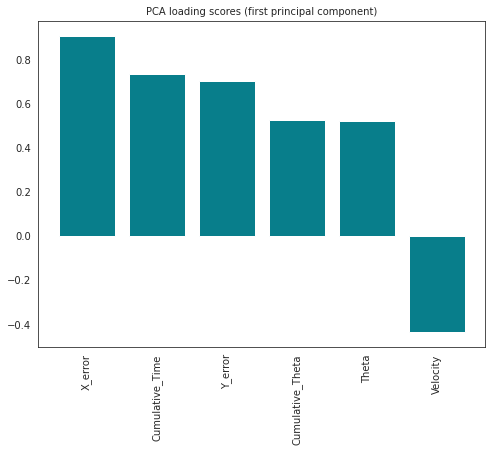

In [111]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']
plt.figure(figsize=(8,6))
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=10)
plt.xticks(rotation='vertical')
plt.show()


In [23]:
data1=data.copy(deep=True)
data1=data1.drop(['Distance_travelled_error','X_error','Y_error'],axis=1)
data1

,Series_ID,Theta,Velocity,Cumulative_Time,Cumulative_Theta,Surface_Type,Label
0,0.0,0.000000e+00,0.25,0.545720,0.000000e+00,TILE,1
1,0.0,0.000000e+00,0.25,1.141841,0.000000e+00,TILE,1
2,0.0,0.000000e+00,0.25,1.787944,0.000000e+00,TILE,1
3,0.0,0.000000e+00,0.25,2.484894,0.000000e+00,TILE,1
4,0.0,0.000000e+00,0.25,3.218403,0.000000e+00,TILE,1
...,...,...,...,...,...,...,...
13313,61.0,-2.449294e-16,0.30,746.610621,-3.477997e-14,CARPET,1
13314,61.0,-2.449294e-16,0.30,756.146195,-3.502490e-14,CARPET,1
13315,61.0,-2.449294e-16,0.30,765.731923,-3.526983e-14,CARPET,1
13316,61.0,-2.449294e-16,0.30,775.367627,-3.551476e-14,CARPET,1


In [24]:
array=data1.values
x=array[:,0:5]
y=array[:,5]
y

array(['TILE', 'TILE', 'TILE', ..., 'CARPET', 'CARPET', 'CARPET'],
      dtype=object)

In [25]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)


TypeError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# Train a basic logit model on this simple data,
# replace this with your model
clf = LogisticRegression().fit(x, y)
# Here's how you use permutation importance
result = permutation_importance(clf, x, y, n_repeats=10,
                                random_state=0)
print('Permutation importance scores', result.importances)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:

df = mobile_robot_data[['X_ODOM','Y_ODOM','X_GR','Y_GR','Theta','Velocity','Cumulative_Time','Cumulative_Theta','Distance_travelled_error']]
nbrs = NearestNeighbors(n_neighbors = 10)
# fit model
nbrs.fit(df)


In [ ]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [ ]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

In [ ]:
distances_mean.describe()

In [ ]:
th = 9.0
outlier_index = np.where(distances_mean > th)
outlier_index


In [ ]:
outlier_values = df.iloc[outlier_index]
outlier_values

In [ ]:
plt.figure(figsize=(20, 7))
plt.scatter(df["Velocity"], df["Theta"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Velocity"], outlier_values["Theta"], color = "r")

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df["Cumulative_Time"], df["Distance_travelled_error"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Cumulative_Time"], outlier_values["Distance_travelled_error"], color = "r")
plt.xlabel("Runtime in milliseconds")
plt.ylabel("Distance_travelled_error")

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X=mobile_robot_data[['Theta']]
Y=mobile_robot_data[['Distance_travelled_error']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [ ]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

In [ ]:

#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

In [ ]:
slr.intercept_[0]
slr.coef_[0][0]
print('Regression Equation: Sales = '+str(slr.intercept_[0])+'+'+  str(slr.coef_[0][0]) +'* Theta')

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 1.3739008824165366 + 0.86386133*x_train, 'r')
plt.show()

In [ ]:
#Prediction of Test and Training set result  
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [ ]:
print("Prediction for test set: {}".format(y_pred_slr))


In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

In [ ]:
y_pred_mlr= mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))
 